Dataset Observations

In [2]:
import pandas as pd

In [4]:
file_path = 'C:\Project-4\Processed_Flipdata - Processed_Flipdata.csv'
data = pd.read_csv(file_path)

# Display basic information
print(data.info())

# Display the first few rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB
None
   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000  

Data Cleaning Summary

In [19]:
# Data Cleaning

# Remove irrelevant column
data_cleaned = data.drop(columns=["Unnamed: 0"])

In [20]:
# Convert 'Prize' to numeric format by removing commas
data_cleaned['Prize'] = data_cleaned['Prize'].str.replace(',', '').astype(float)

In [21]:
# Extract numerical values from 'Rear Camera' and 'Front Camera'
data_cleaned['Rear Camera'] = data_cleaned['Rear Camera'].str.extract('(\d+)').astype(float)
data_cleaned['Front Camera'] = data_cleaned['Front Camera'].str.extract('(\d+)').astype(float)

In [22]:
# Verify the cleaning process
data_cleaned_info = data_cleaned.info()
data_cleaned_head = data_cleaned.head()

data_cleaned_info, data_cleaned_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    float64
 6   Front Camera   541 non-null    float64
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.6+ KB


(None,
              Model        Colour  Memory  RAM  Battery_  Rear Camera  \
 0  Infinix SMART 7   Night Black      64    4      6000         13.0   
 1  Infinix SMART 7    Azure Blue      64    4      6000         13.0   
 2     MOTOROLA G32  Mineral Gray     128    8      5000         50.0   
 3         POCO C50    Royal Blue      32    2      5000          8.0   
 4  Infinix HOT 30i      Marigold     128    8      5000         50.0   
 
    Front Camera  AI Lens  Mobile Height                  Processor_    Prize  
 0           5.0        1          16.76  Unisoc Spreadtrum SC9863A1   7299.0  
 1           5.0        1          16.76  Unisoc Spreadtrum SC9863A1   7299.0  
 2          16.0        0          16.64     Qualcomm Snapdragon 680  11999.0  
 3           5.0        0          16.56          Mediatek Helio A22   5649.0  
 4           5.0        1          16.76                         G37   8999.0  )

Data Cleaning Summary
Irrelevant Column Removed: The column Unnamed: 0 was dropped.
Target Variable (Prize): Converted to numeric by removing commas.
Camera Features: Extracted numerical values from Rear Camera and Front Camera.
Result: The dataset now has 11 columns, with all numeric and categorical fields cleaned and ready for analysis

In [23]:
from sklearn.preprocessing import LabelEncoder

# Feature Transformation

# Encode categorical features using LabelEncoder
label_encoders = {}
categorical_features = ["Model", "Colour", "Processor_"]

for feature in categorical_features:
    encoder = LabelEncoder()
    data_cleaned[feature] = encoder.fit_transform(data_cleaned[feature])
    label_encoders[feature] = encoder

Correlation Analysis Results

In [31]:
import matplotlib.pyplot as plt
# Correlation Analysis
correlation_matrix = data_cleaned.corr()

# Filter correlations with the target variable ('Prize')
correlation_with_price = correlation_matrix["Prize"].sort_values(ascending=False)

correlation_with_price



Prize            1.000000
Memory           0.566660
Front Camera     0.532321
RAM              0.532024
Rear Camera      0.410367
Mobile Height    0.176009
Colour           0.038895
Battery_        -0.034297
Processor_      -0.050244
Model           -0.075163
AI Lens         -0.153691
Name: Prize, dtype: float64

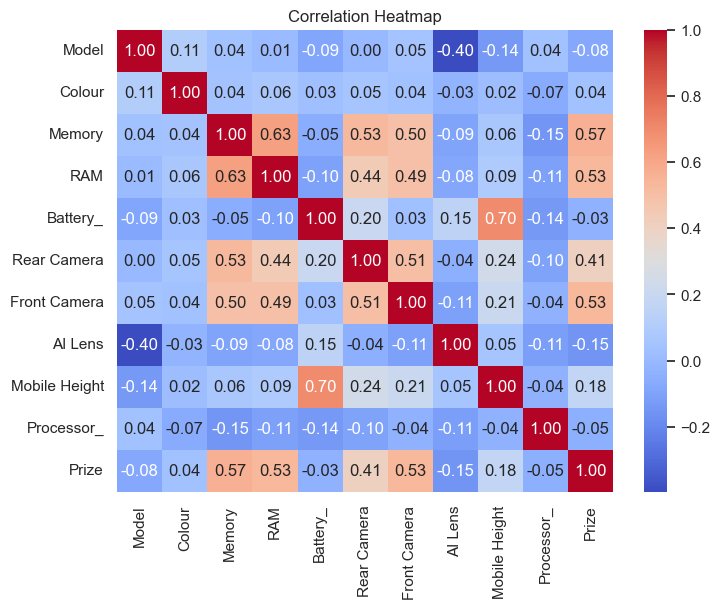

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation Analysis Results
Here are the correlations between the features and the target variable (Prize):

Highly Correlated Features:

Memory: 0.5667
Front Camera: 0.5323
RAM: 0.5320
Rear Camera: 0.4104
Moderately Correlated Features:

Mobile Height: 0.1760
Weakly or Negatively Correlated Features:

Colour: 0.0389
Battery_: -0.0343
Processor_: -0.0502
Model: -0.0752
AI Lens: -0.1537
Insights
Memory, Front Camera, RAM, and Rear Camera have the strongest positive correlations with price, making them key features for the predictive model.
Features like Battery_ and AI Lens have weak or negative correlations, potentially contributing less to the prediction.

Feature Selection and Model Evaluation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data_cleaned.drop(columns=["Prize"])
y = data_cleaned["Prize"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Lasso Regression
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0]

# Train a Random Forest Regressor using selected features
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train[selected_features], y_train)

# Predictions
y_pred = rf.predict(X_test[selected_features])

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

selected_features, mae, rmse, r2


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(Index(['Model', 'Colour', 'Memory', 'Battery_', 'Rear Camera', 'Front Camera'], dtype='object'),
 np.float64(2047.0205635648758),
 np.float64(4642.759309760669),
 0.8436076397983108)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15720\1916356424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


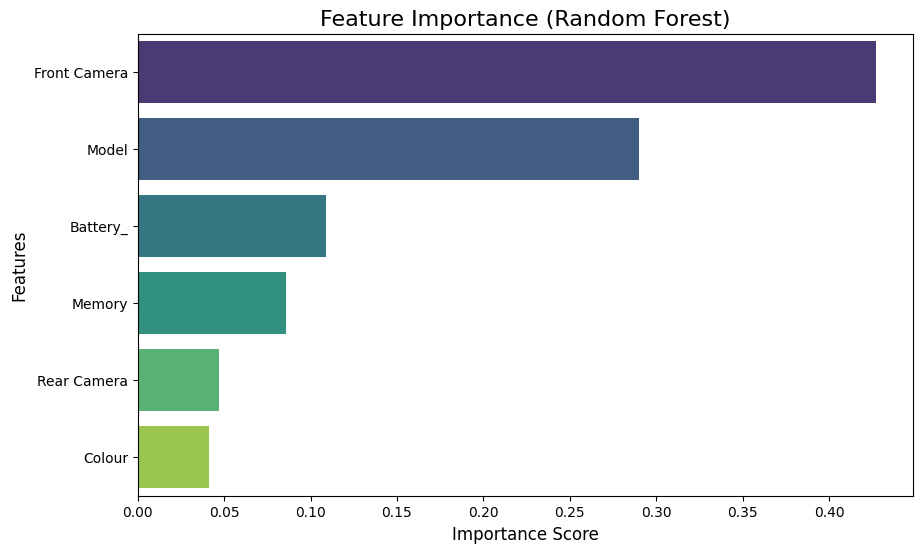

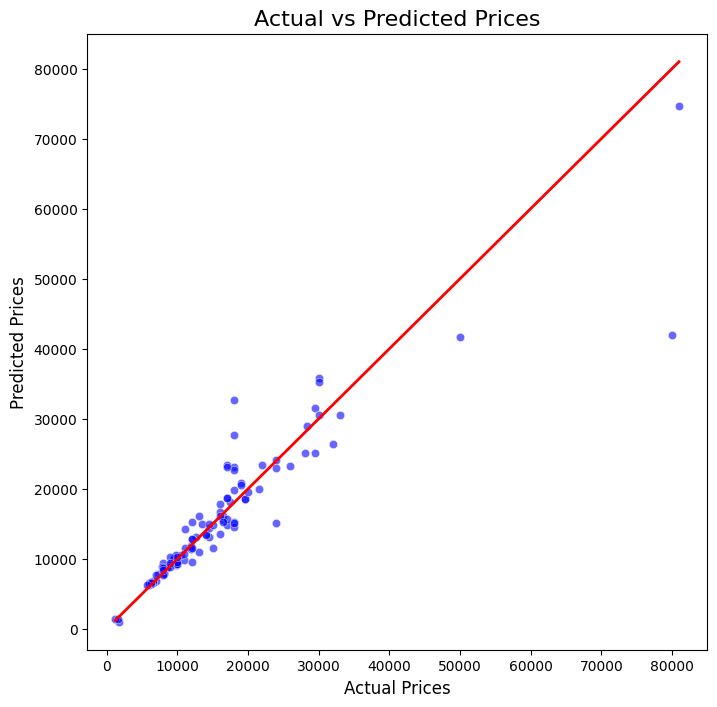

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the Random Forest model
feature_importance = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

# Visualize actual vs predicted prices
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.title("Actual vs Predicted Prices", fontsize=16)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)  # Reference line
plt.show()


Visualizations
1.Feature Importance:

.The bar chart shows the relative contribution of each selected feature to the prediction of handset prices. Features such as Memory, Front Camera, and RAM have higher importance compared to others like Colour

2.Actual vs Predicted Prices:

.The scatterplot compares the actual handset prices to the model's predictions.
.The red diagonal line represents perfect predictions. The closer the points are to this line, the better the model's performance

In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Train XGBoost Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train[selected_features], y_train)
xgb_pred = xgb_model.predict(X_test[selected_features])

# Evaluate XGBoost Model
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

# Train LightGBM Model
lgbm_model = LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
lgbm_model.fit(X_train[selected_features], y_train)
lgbm_pred = lgbm_model.predict(X_test[selected_features])

# Evaluate LightGBM Model
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
lgbm_r2 = r2_score(y_test, lgbm_pred)

# Collect results
model_performance = {
    "Random Forest": {"MAE": mae, "RMSE": rmse, "R2": r2},
    "XGBoost": {"MAE": xgb_mae, "RMSE": xgb_rmse, "R2": xgb_r2},
    "LightGBM": {"MAE": lgbm_mae, "RMSE": lgbm_rmse, "R2": lgbm_r2},
}

model_performance


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 6
[LightGBM] [Info] Start training from score 16376.893519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Random Forest': {'MAE': np.float64(2047.0205635648758),
  'RMSE': np.float64(4642.759309760669),
  'R2': 0.8436076397983108},
 'XGBoost': {'MAE': np.float64(2009.6276922663417),
  'RMSE': np.float64(5583.006258627045),
  'R2': 0.7738485252178381},
 'LightGBM': {'MAE': np.float64(2976.7835253994863),
  'RMSE': np.float64(6649.436695604256),
  'R2': 0.6792010734638604}}

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Perform 5-fold cross-validation for MAE, RMSE, and R²
mae_scores = -cross_val_score(rf, X_train[selected_features], y_train, cv=5, scoring="neg_mean_absolute_error")
rmse_scores = np.sqrt(-cross_val_score(rf, X_train[selected_features], y_train, cv=5, scoring="neg_mean_squared_error"))
r2_scores = cross_val_score(rf, X_train[selected_features], y_train, cv=5, scoring="r2")

# Residual Analysis
y_train_pred = cross_val_predict(rf, X_train[selected_features], y_train, cv=5)
residuals = y_train - y_train_pred

# Summary of cross-validation results
cv_results = {
    "MAE Mean": mae_scores.mean(),
    "MAE Std": mae_scores.std(),
    "RMSE Mean": rmse_scores.mean(),
    "RMSE Std": rmse_scores.std(),
    "R2 Mean": r2_scores.mean(),
    "R2 Std": r2_scores.std()
}

cv_results, residuals.describe()


({'MAE Mean': np.float64(2271.5215735513384),
  'MAE Std': np.float64(291.1011060480284),
  'RMSE Mean': np.float64(4123.022071739093),
  'RMSE Std': np.float64(719.9857235688899),
  'R2 Mean': np.float64(0.8304336683921495),
  'R2 Std': np.float64(0.08207373936391686)},
 count      432.000000
 mean      -179.381781
 std       4185.131451
 min     -23911.110000
 25%      -1175.658929
 50%       -203.850000
 75%        937.791667
 max      21914.090000
 Name: Prize, dtype: float64)